In [1]:
#pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
data = pd.read_excel('Books_Data_Clean.xlsx')

In [4]:
data.head()

,index,Publishing_Year,Book_Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross_sales,publisher_revenue,sale_price,sales_rank,Publisher,units_sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [5]:
# Identify missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing_Year      1069 non-null   float64
 2   Book_Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross_sales          1070 non-null   float64
 10  publisher_revenue    1070 non-null   float64
 11  sale_price           1070 non-null   float64
 12  sales_rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units_sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [6]:
# Identify null values
data.isnull().sum()

index                   0
Publishing_Year         1
Book_Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross_sales             0
publisher_revenue       0
sale_price              0
sales_rank              0
Publisher               0
units_sold              0
dtype: int64

In [7]:
# Remove the rows which have missing language_code
data.dropna(subset = ['language_code'], inplace = True)

In [8]:
# Drop the duplicates from the dataset completely
data = data.drop_duplicates()

In [9]:
#for col in data.columns:
    #print(col, len(data[col].unique()), data[col].unique())

In [10]:
# Check the negative values in the Publishing_Year
print('Number of negative values in Publishing Year : ', (data.Publishing_Year < 0).sum())

Number of negative values in Publishing Year :  6


In [11]:
# Remove the rows with negative values in the Publishing_Year
data = data[data['Publishing_Year'] >= 0]

C:\Users\wijay\AppData\Local\Temp\ipykernel_15364\380609946.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.scatterplot(y = 'Book_ratings_count', x = 'Publishing_Year', data = data, palette = 'coolwarm')


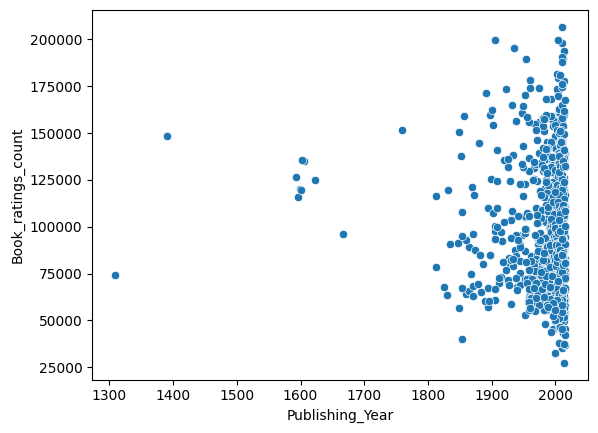

In [12]:
# Gross Sales according to the Publishing_Year
graph = sns.scatterplot(y = 'Book_ratings_count', x = 'Publishing_Year', data = data, palette = 'coolwarm')
plt.show()

In [13]:
# Data outside the year of 1800
(data.Publishing_Year <= 1800).sum()

11

In [14]:
# Data outside the year of 2023
(data.Publishing_Year >= 2023).sum()

0

In [15]:
# Filter data between 1800 to 2023 to remove outliers in Publishing_Year
data = data[(data['Publishing_Year'] <= 2023) & (data['Publishing_Year'] >= 1800)]

In [16]:
# Reset the index of the dataset
data = data.reset_index(drop = True)

In [17]:
# Statistical analysis for integers and float
data.describe()

,index,Publishing_Year,Book_average_rating,Book_ratings_count,gross_sales,publisher_revenue,sale_price,sales_rank,units_sold
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,533.051000,1989.930000,4.009940,95252.94100,1893.755790,861.046170,4.887190,609.979000,9717.702000
std,309.558248,34.267848,0.247683,31735.91754,4034.013598,2315.211784,3.592078,370.339301,15378.159681
min,0.000000,1812.000000,2.970000,27308.00000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,264.750000,1986.000000,3.857500,70663.25000,374.895000,0.000000,1.990000,284.500000,593.750000
50%,534.500000,2003.000000,4.020000,89518.50000,814.255000,271.719000,3.990000,595.500000,3937.500000
75%,801.250000,2010.000000,4.180000,114069.00000,1489.995000,726.444000,6.990000,931.500000,5400.000000
max,1069.000000,2016.000000,4.770000,206792.00000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [18]:
# Statistical analysis for string
data.describe(include = 'object')

,Book_Name,Author,language_code,Author_Rating,genre,Publisher
count,981,1000,1000,1000,1000,1000
unique,979,696,8,4,4,9
top,Persepolis,Stephen King,eng,Intermediate,genre fiction,"Amazon Digital Services, Inc."
freq,2,27,722,582,770,562


In [19]:
# Drop unnessary columns
columns_to_drop = ['index', 'Book_Name', 'Author', 'publisher_revenue', 'sale_price', 'sales_rank', 'units_sold', 'Publisher']
data = data.drop(columns=columns_to_drop)
data

,Publishing_Year,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross_sales
0,1975.0,en-US,Novice,3.42,155903,genre fiction,34160.00
1,1987.0,eng,Intermediate,4.23,145267,genre fiction,12437.50
2,2015.0,eng,Novice,3.31,138669,genre fiction,47795.00
3,2008.0,en-US,Intermediate,4.04,150898,fiction,41250.00
4,2011.0,eng,Intermediate,4.04,198283,genre fiction,37952.50
...,...,...,...,...,...,...,...
995,2014.0,eng,Intermediate,3.52,37379,nonfiction,104.94
996,1989.0,eng,Excellent,4.34,57312,genre fiction,846.94
997,1930.0,eng,Intermediate,3.92,58742,genre fiction,846.94
998,2011.0,en-US,Excellent,4.17,58028,genre fiction,104.94


In [20]:
# Convert 'Object' data type to 'integer' data type
dummies = ['language_code', 'Author_Rating', 'genre']
data = data.join(pd.get_dummies(data[dummies]).astype(int)).drop(dummies, axis=1)
data

,Publishing_Year,Book_average_rating,Book_ratings_count,gross_sales,language_code_ara,language_code_en-CA,language_code_en-GB,language_code_en-US,language_code_eng,language_code_fre,language_code_nl,language_code_spa,Author_Rating_Excellent,Author_Rating_Famous,Author_Rating_Intermediate,Author_Rating_Novice,genre_children,genre_fiction,genre_genre fiction,genre_nonfiction
0,1975.0,3.42,155903,34160.00,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,1987.0,4.23,145267,12437.50,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,2015.0,3.31,138669,47795.00,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,2008.0,4.04,150898,41250.00,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,2011.0,4.04,198283,37952.50,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2014.0,3.52,37379,104.94,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
996,1989.0,4.34,57312,846.94,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
997,1930.0,3.92,58742,846.94,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
998,2011.0,4.17,58028,104.94,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [21]:
# Split the dataset into 80% train and 20% test dataset
from sklearn.model_selection import train_test_split

x = data.drop(['gross_sales'], axis=1)
y = data['gross_sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
# Use DecisionTreeRegressor for regression
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()  
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [23]:
# Check the accuracy
from sklearn.metrics import mean_squared_error

score = mean_squared_error(y_test, predictions)
print("Mean Squared Error = ", score)

Mean Squared Error =  17395178.7284895


In [24]:
# Build a train model
joblib.dump(model, 'Book-Sales-Predictions.joblib')

['Book-Sales-Predictions.joblib']

In [25]:
# Load the model and get predictions

input_data = [2023, 4.03, 6500, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
input_data2 = [2022, 4.03, 6500, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]

# Reshape the input data to a 2D array
input_data_2d = [input_data,input_data2]

loaded_model = joblib.load('Book-Sales-Predictions.joblib')

# Make the prediction
predictions = loaded_model.predict(input_data_2d)
print(predictions)

[1200.1 1200.1]


C:\Users\wijay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
